## WEEK 3

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

data=pd.read_csv('cleaned_dataset.csv')

In [0]:
data.head(3)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO


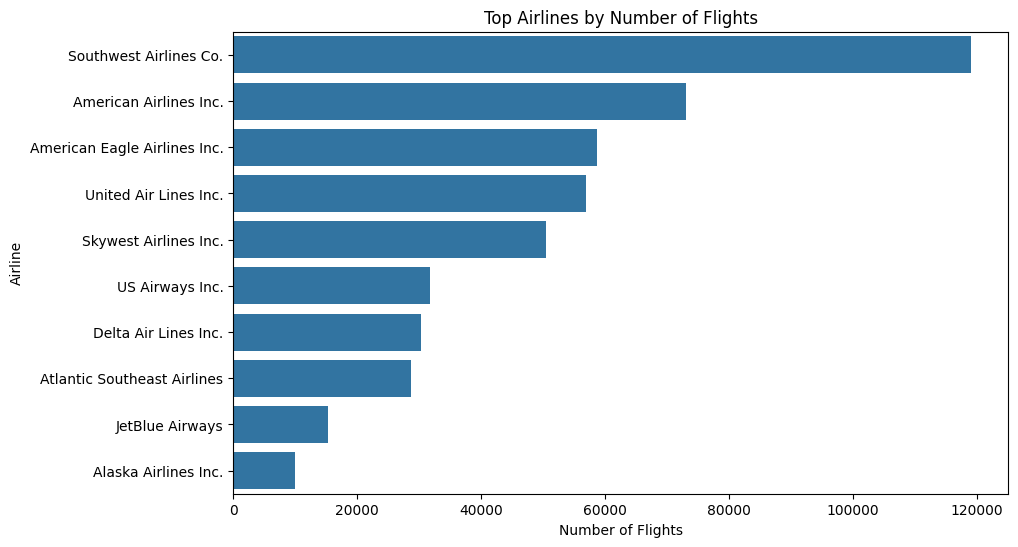

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Top airlines---
plt.figure(figsize=(10,6))
top_airlines = data['Airline'].value_counts().head(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index)
plt.title('Top Airlines by Number of Flights')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

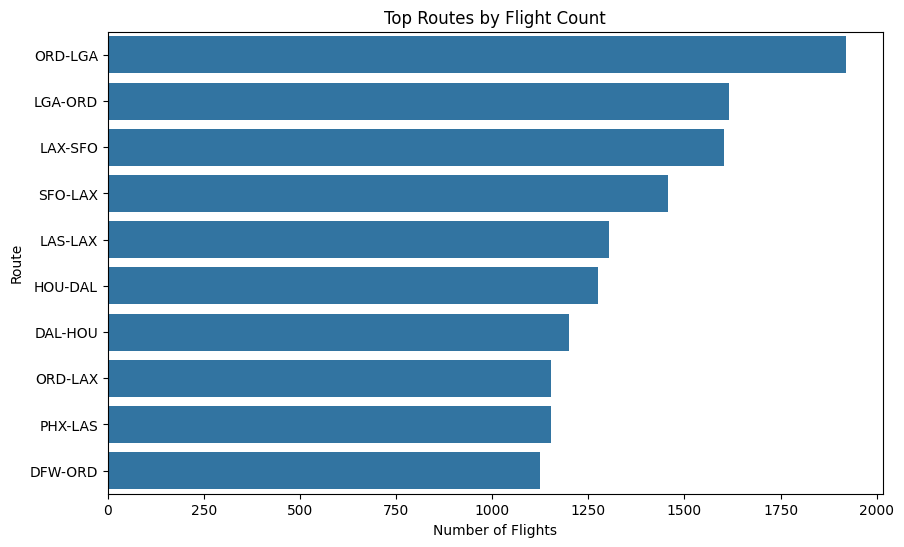

In [0]:
# Top Routes
plt.figure(figsize=(10,6))
top_routes = data['Route'].value_counts().head(10)
sns.barplot(x=top_routes.values, y=top_routes.index)
plt.title('Top Routes by Flight Count')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

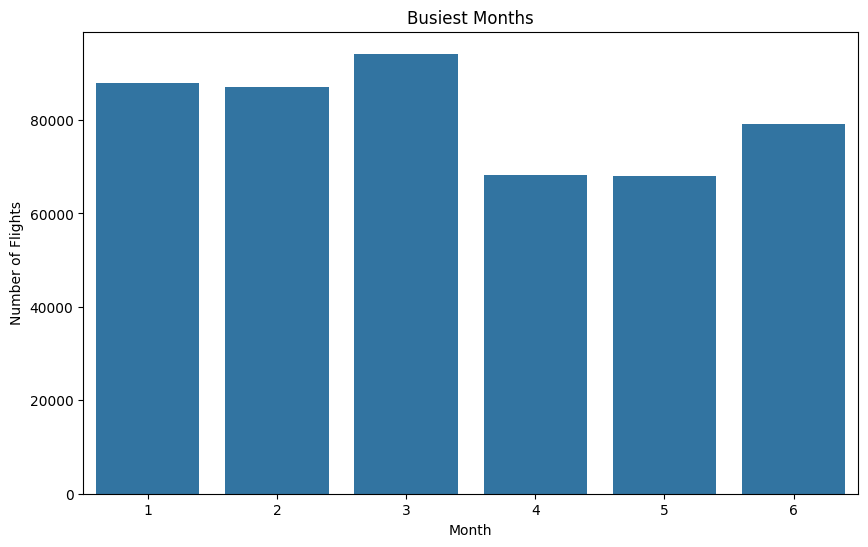

In [0]:
# Busiest Months
plt.figure(figsize=(10,6))
top_months = data['Month'].value_counts()
sns.barplot(x=top_months.index, y=top_months.values)
plt.title('Busiest Months')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

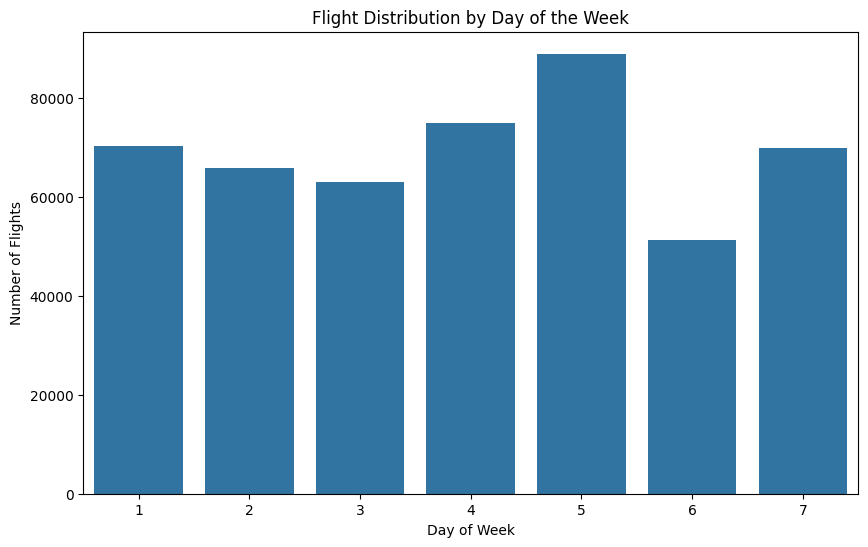

In [0]:
# --- Flight distribution by day of the week---
plt.figure(figsize=(10,6))
days=data['DayOfWeek'].value_counts()
sns.barplot(x=days.index,y=days.values)
plt.title('Flight Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.show()

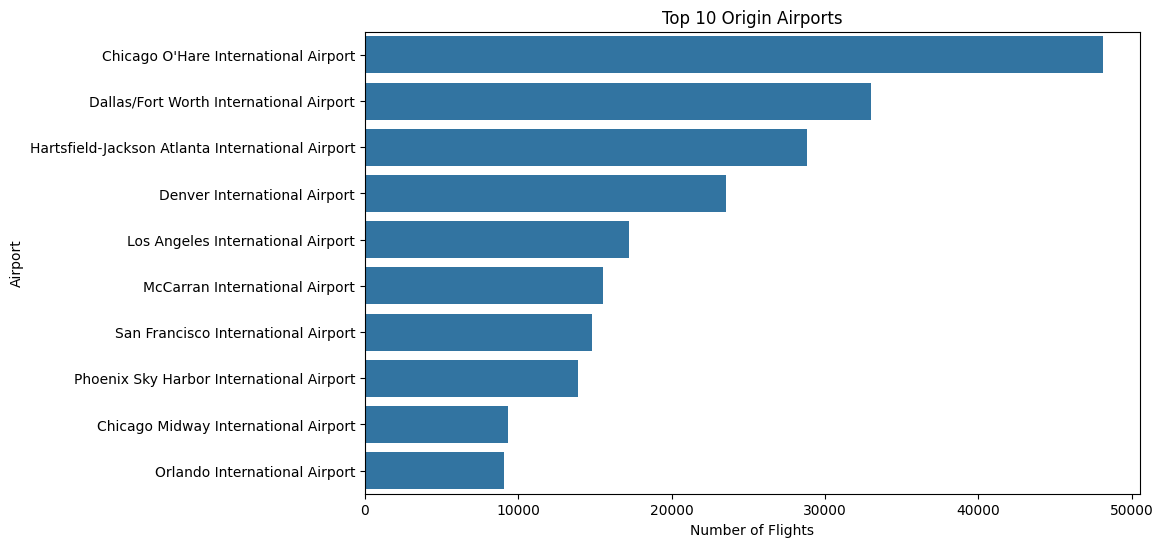

In [0]:
#by airport
plt.figure(figsize=(10,6))
top_airports = data['Org_Airport'].value_counts().head(10)
sns.barplot(x=top_airports.values, y=top_airports.index)
plt.title('Top 10 Origin Airports')
plt.xlabel('Number of Flights')
plt.ylabel('Airport')
plt.show()

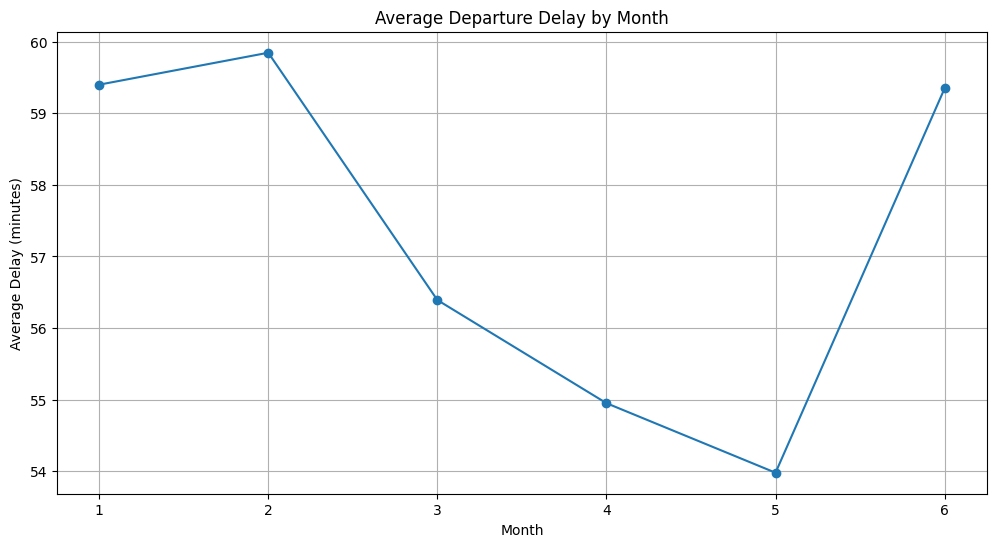

In [0]:
#line plot
plt.figure(figsize=(12,6))
avg_delay = data.groupby('Month')['DepDelay'].mean()
plt.plot(avg_delay.index, avg_delay.values, marker='o')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid()
plt.show()

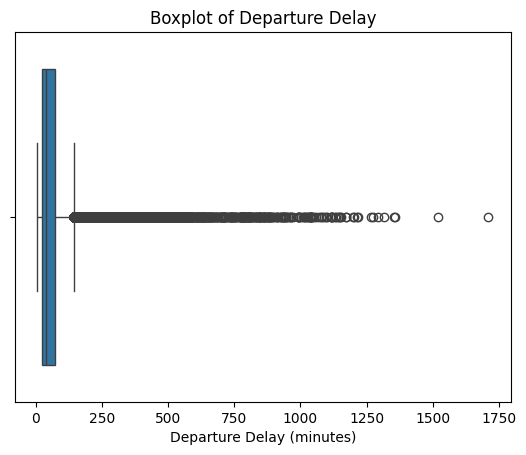

In [0]:
# Boxplot to detect outliers in delay
sns.boxplot(x=data['DepDelay'])
plt.title("Boxplot of Departure Delay")
plt.xlabel("Departure Delay (minutes)")
plt.show()

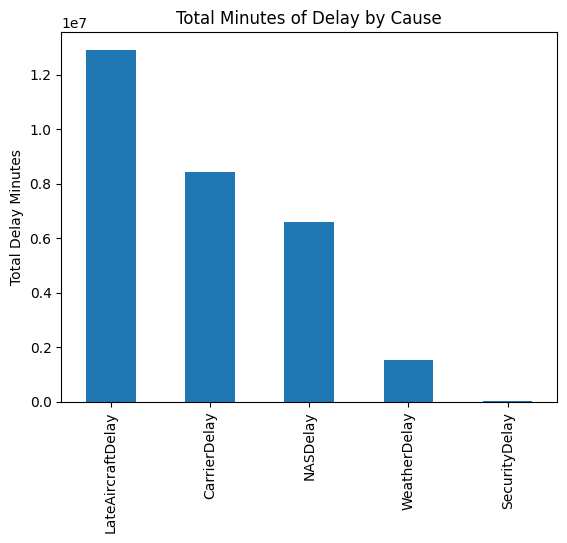

In [0]:
#  Distribution of Delay Causes
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
data[delay_causes].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total Minutes of Delay by Cause")
plt.ylabel("Total Delay Minutes")
plt.show()

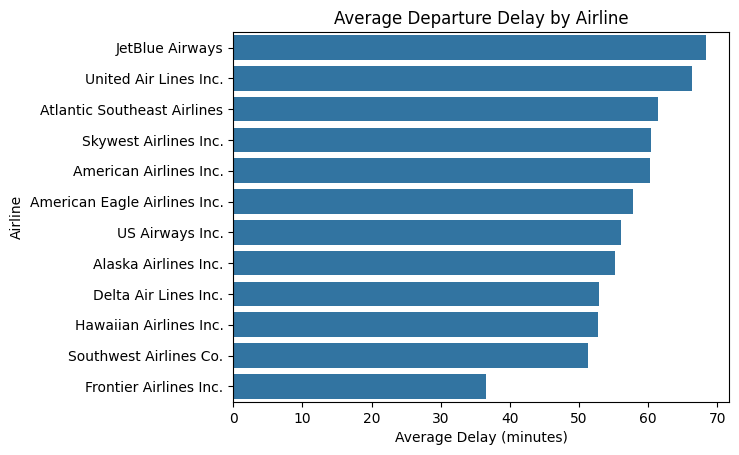

In [0]:
#Average Departure Delay by Airline
avg_delay_airline = data.groupby('Airline')['DepDelay'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_delay_airline, x='DepDelay', y='Airline')
plt.title("Average Departure Delay by Airline")
plt.xlabel("Average Delay (minutes)")
plt.show()

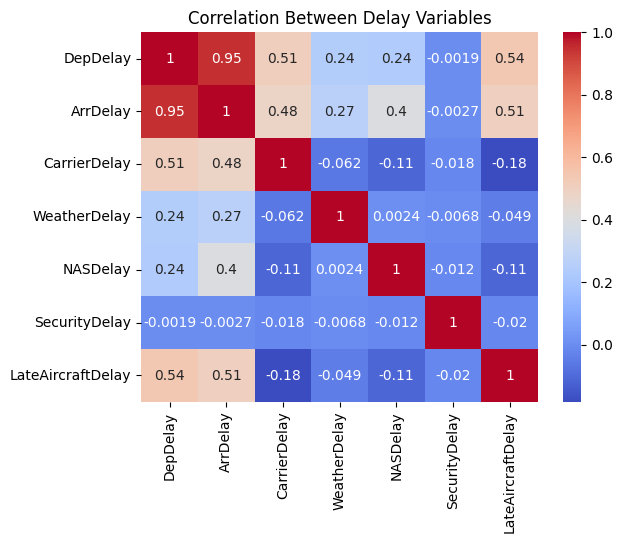

In [0]:
#  Correlation Heatmap for Delay Variables
delay_cols = ['DepDelay', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
sns.heatmap(data[delay_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Variables")
plt.show()

/home/spark-5f72f64c-32d1-4f27-a2dc-5b/.ipykernel/2503/command-6054416585259449-713645656:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


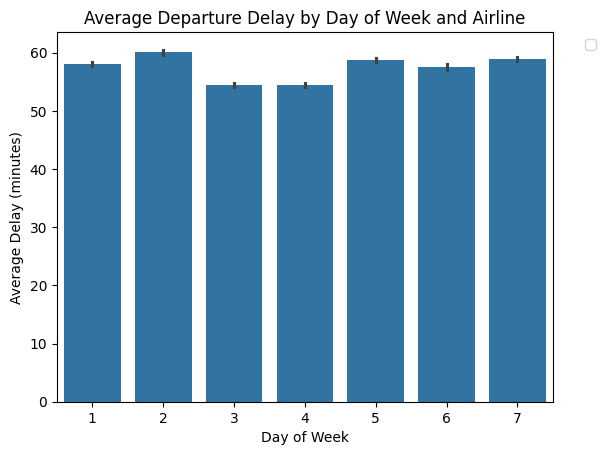

In [0]:
# Departure Delay by Day of Week and Airline
sns.barplot(
    data=data,
     x='DayOfWeek', y='DepDelay',estimator=np.mean
)
plt.title("Average Departure Delay by Day of Week and Airline")
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


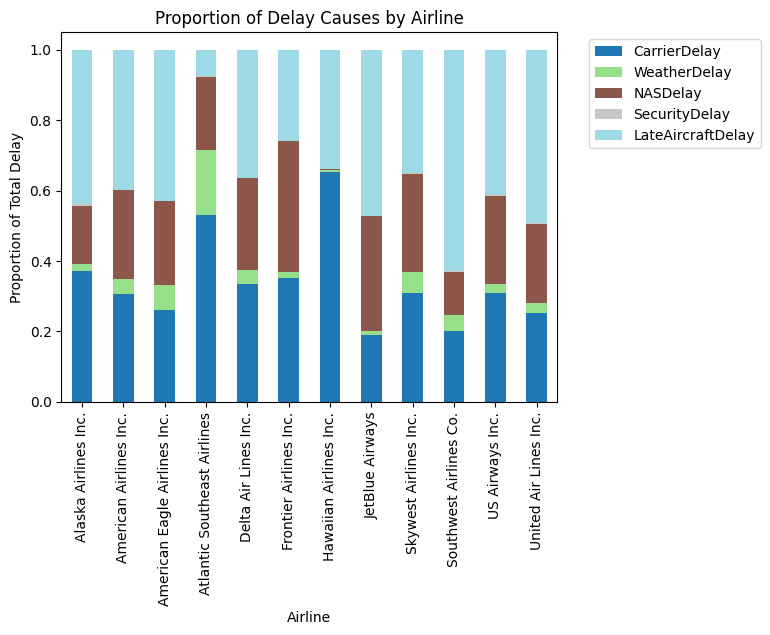

In [0]:
# Proportion of Delay Causes per Airline (Stacked Bar)
delay_causes = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
delay_share = data.groupby('Airline')[delay_causes].mean()
delay_share_norm = delay_share.div(delay_share.sum(axis=1), axis=0)
delay_share_norm.plot(kind='bar', stacked=True, colormap='tab20')
plt.title("Proportion of Delay Causes by Airline")
plt.ylabel("Proportion of Total Delay")
plt.xlabel("Airline")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/home/spark-5f72f64c-32d1-4f27-a2dc-5b/.ipykernel/2503/command-6054416585259452-548097090:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='DayOfWeek',  palette='Set2')
/home/spark-5f72f64c-32d1-4f27-a2dc-5b/.ipykernel/2503/command-6054416585259452-548097090:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Status")


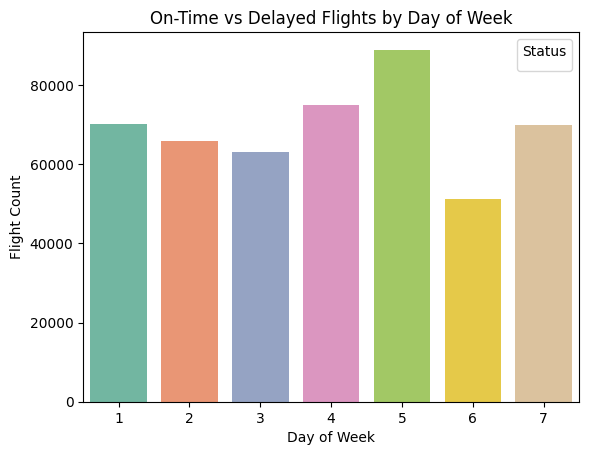

In [0]:
#  Flight Counts vs Delay Status by Day of Week
sns.countplot(data=data, x='DayOfWeek',  palette='Set2')
plt.title("On-Time vs Delayed Flights by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Flight Count")
plt.legend(title="Status")
plt.show()


### WEEK-4
#### Delay Analysis

## WEEK-4


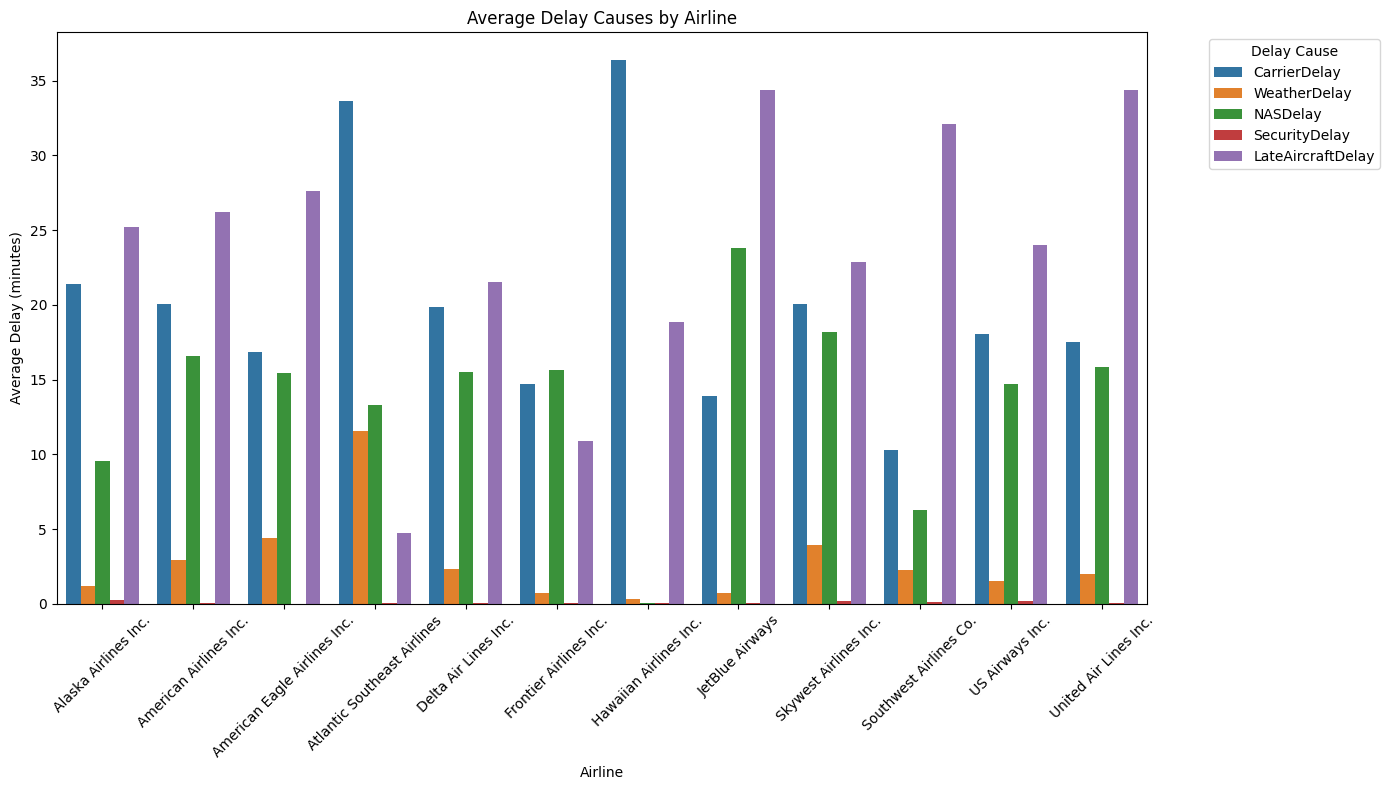

In [0]:
# Compare delay causes by airline
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_by_airline = data.groupby('Airline')[delay_causes].mean().reset_index()
delay_by_airline_melted = delay_by_airline.melt(id_vars='Airline', var_name='DelayCause', value_name='AverageDelay')

plt.figure(figsize=(14,8))
sns.barplot(data=delay_by_airline_melted, x='Airline', y='AverageDelay', hue='DelayCause')
plt.title('Average Delay Causes by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-5f72f64c-32d1-4f27-a2dc-5b/.ipykernel/2503/command-8895094661095227-3252356631:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carrier_delay_by_airline, x='Airline', y='CarrierDelay', palette='Blues_d')


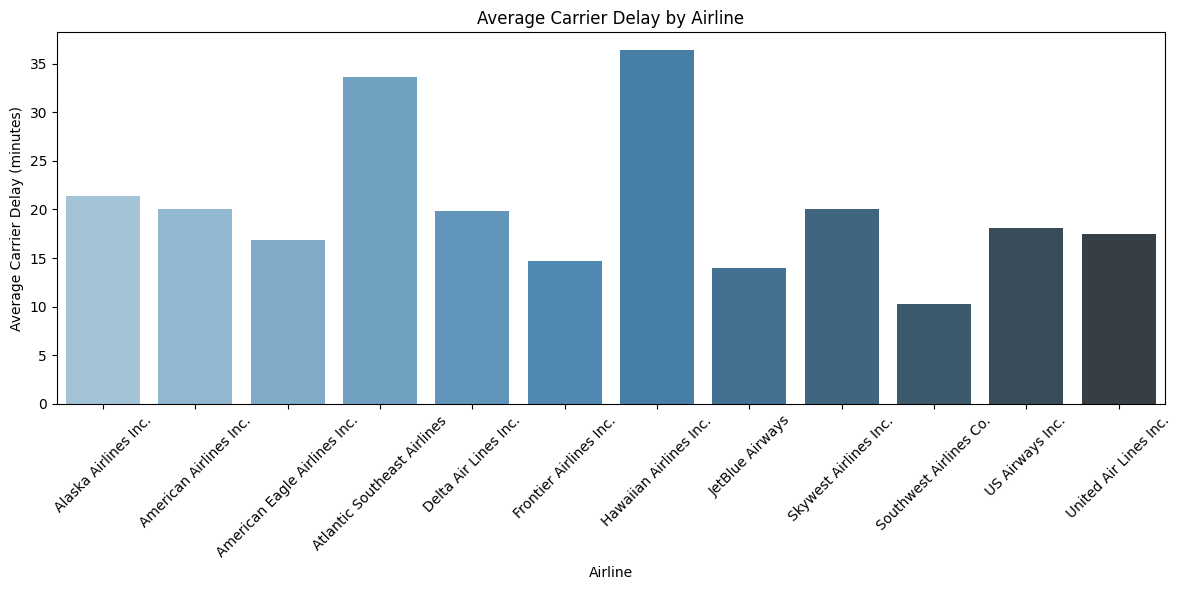

In [0]:
# Explore Carrier Delays
carrier_delay_by_airline = data.groupby('Airline')['CarrierDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=carrier_delay_by_airline, x='Airline', y='CarrierDelay', palette='Blues_d')
plt.title('Average Carrier Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Carrier Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

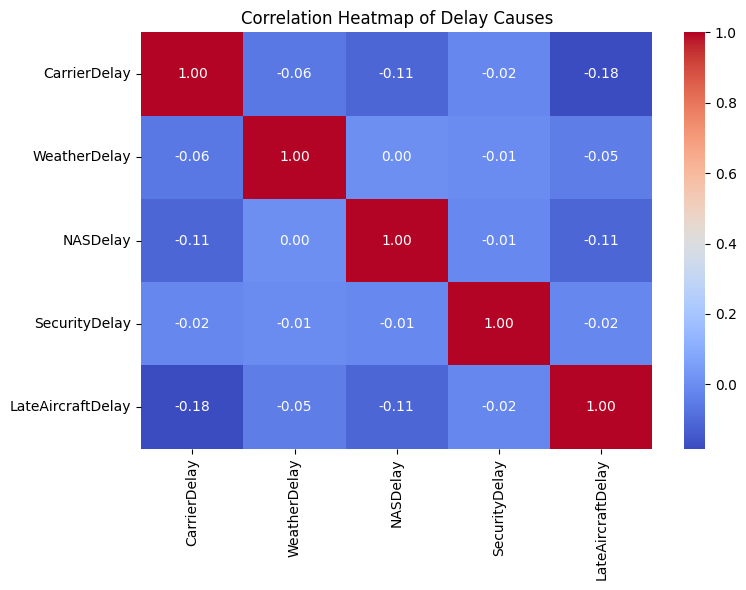

In [0]:
# Heatmap: Correlation between delay causes
plt.figure(figsize=(8,6))
corr = data[delay_causes].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Delay Causes')
plt.tight_layout()
plt.show()

/home/spark-5f72f64c-32d1-4f27-a2dc-5b/.ipykernel/2503/command-8895094661095229-3217536248:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')


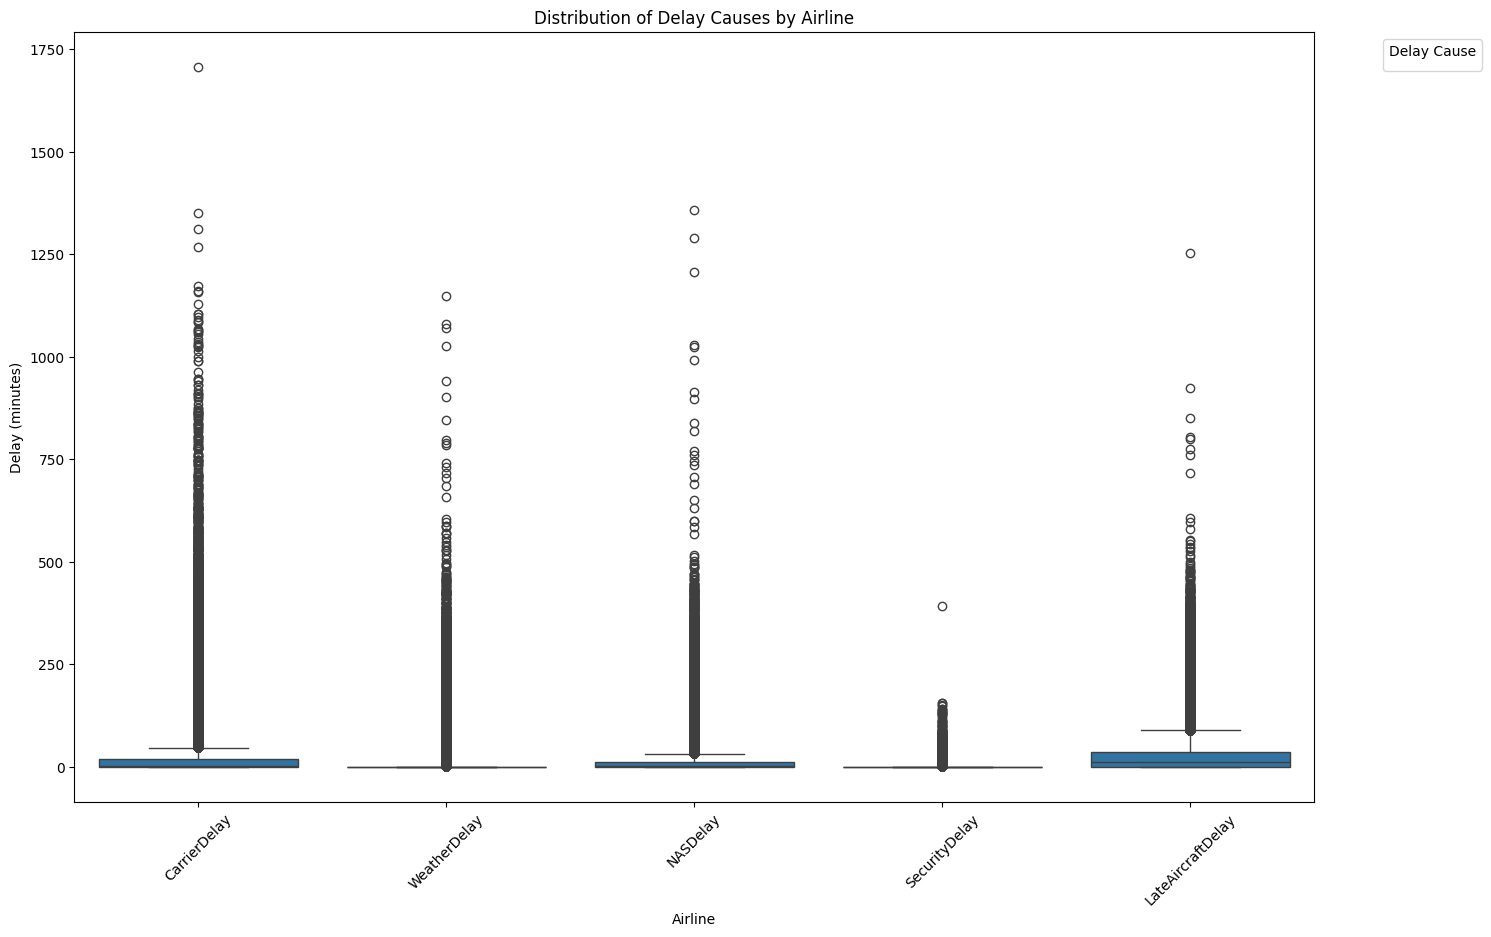

In [0]:
# Boxplot: Distribution of each delay cause by airline
plt.figure(figsize=(16,10))
sns.boxplot(data=data.melt(id_vars='Airline', value_vars=delay_causes, var_name='DelayCause', value_name='Delay'),x='DelayCause', y='Delay')
plt.title('Distribution of Delay Causes by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')
plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

/home/spark-5f72f64c-32d1-4f27-a2dc-5b/.ipykernel/2503/command-8895094661095230-1044704584:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_delay_by_airline, x='Airline', y='TotalDelay', palette='Reds_d')


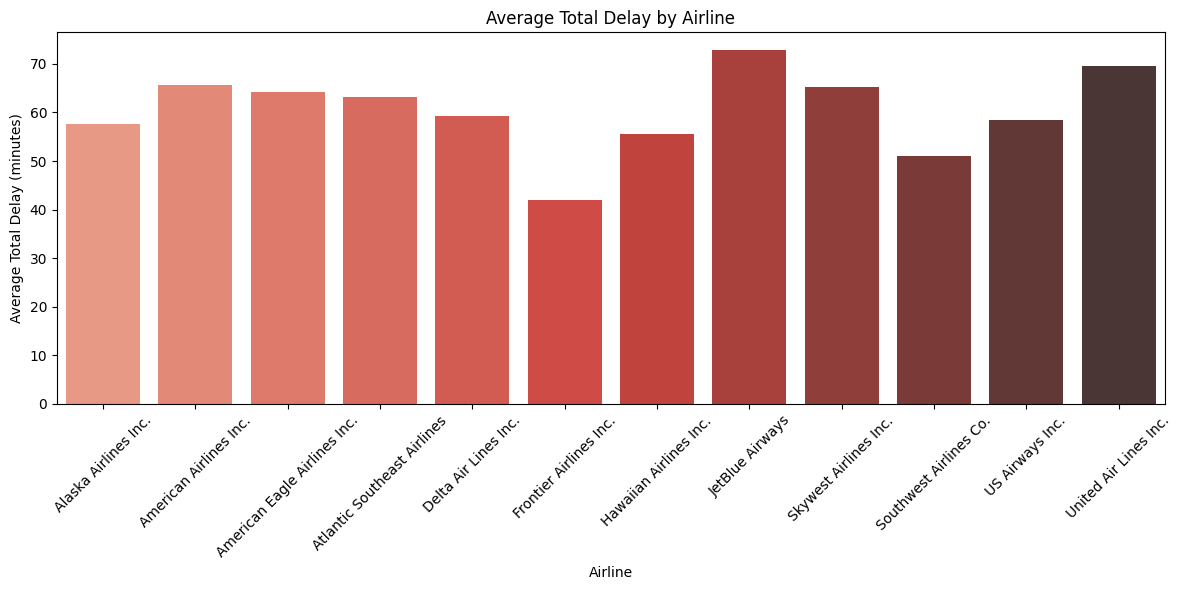

In [0]:
# Explore if certain airlines have higher total delays
data['TotalDelay'] = data[delay_causes].sum(axis=1)
total_delay_by_airline = data.groupby('Airline')['TotalDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=total_delay_by_airline, x='Airline', y='TotalDelay', palette='Reds_d')
plt.title('Average Total Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

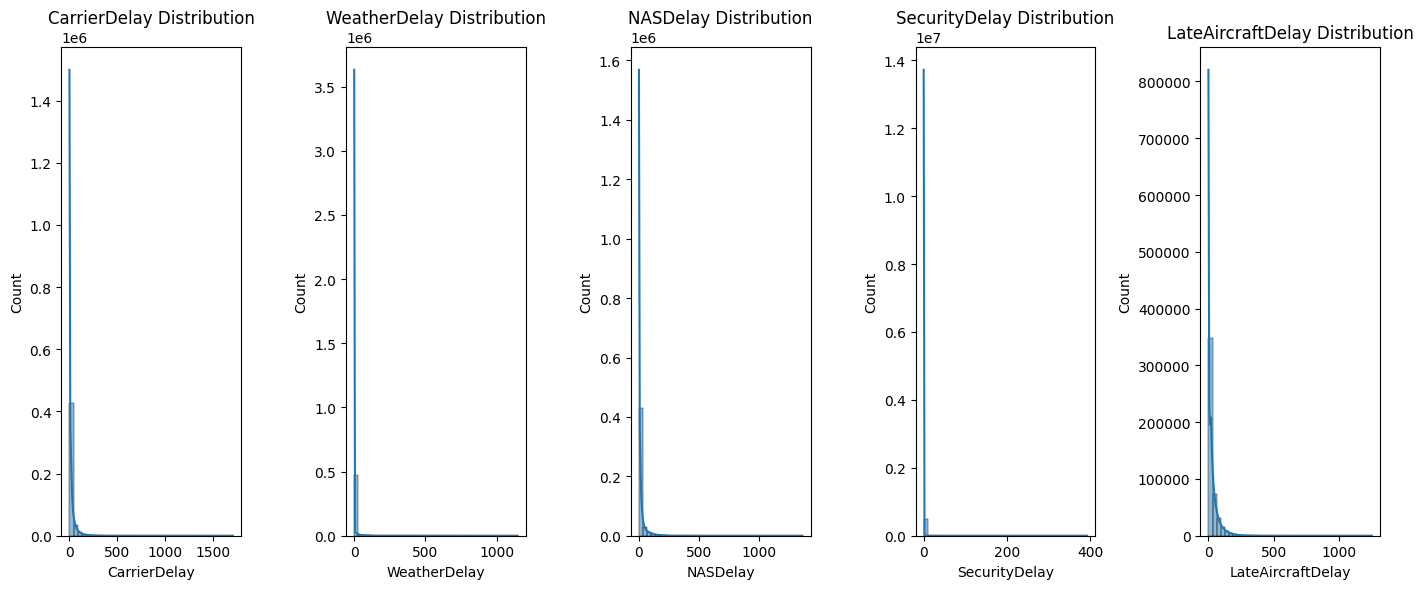

In [0]:
plt.figure(figsize=(14,6))
n=len(delay_causes)
for i, col in enumerate(delay_causes, 1):
    plt.subplot(1, n, i)
    sns.histplot(data[col], bins=40, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


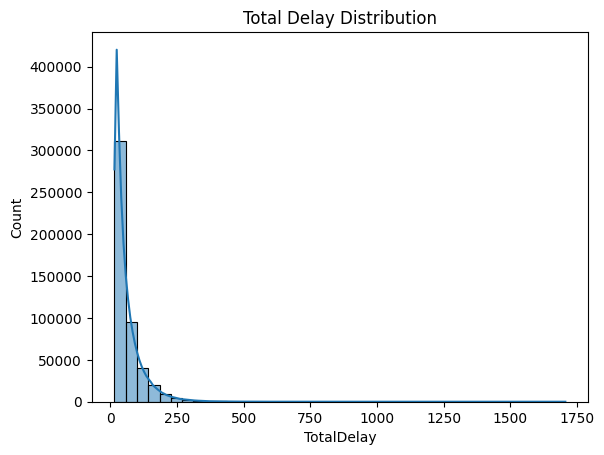

In [0]:
sns.histplot(data['TotalDelay'],bins=40,kde=True)
plt.title('Total Delay Distribution')
plt.show()

In [0]:
# Convert time and date columns
data['Hour'] = data['DepTime'].str.split(':').str[0].astype(int)

<Figure size 1200x600 with 0 Axes>

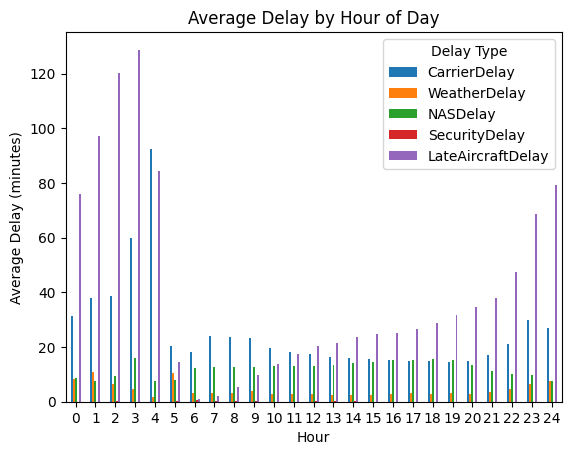

In [0]:
delay_by_hour = data.groupby('Hour')[delay_causes].mean()

plt.figure(figsize=(12,6))
delay_by_hour.plot(kind='bar')
plt.title('Average Delay by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.legend(title='Delay Type')

plt.show()


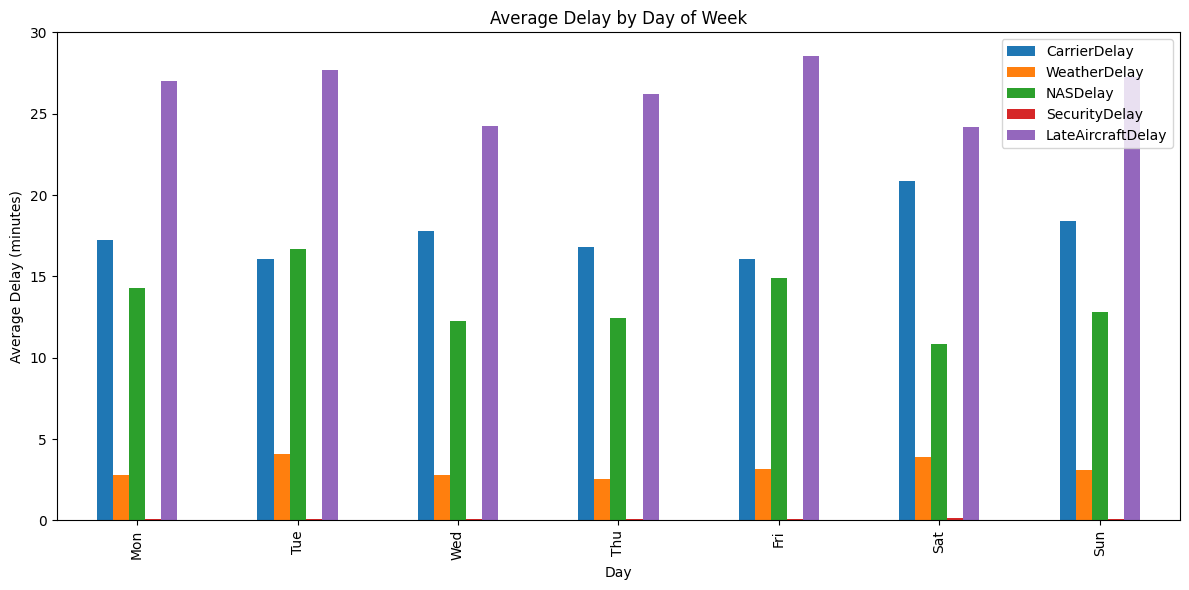

In [0]:
days = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
data['DayName'] = data['DayOfWeek'].map(days)

delay_by_day = data.groupby('DayName')[delay_causes].mean()
delay_by_day = delay_by_day.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

delay_by_day.plot(kind='bar', figsize=(12,6))
plt.title('Average Delay by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()


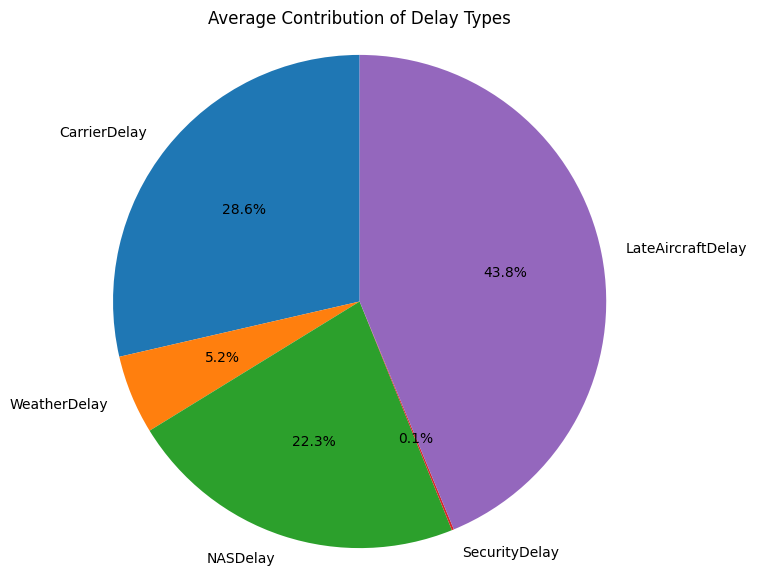

In [0]:
avg_delay_contribution = data[delay_causes].mean()
plt.figure(figsize=(7,7))
plt.pie(avg_delay_contribution, labels=delay_causes, autopct='%1.1f%%', startangle=90)
plt.title('Average Contribution of Delay Types')
plt.axis('equal')
plt.show()